# NLTK 
Natural Language ToolKit (NLTK) is a comprehensive Python library for natural language processing and text analytics. Originally designed for teaching, it has been adopted in the industry for research and development due to its usefulness and breadth of coverage. NLTK is often used for rapid prototyping of text processing programs and can even be used in production applications. Demos of select NLTK functionality and production-ready APIs are available at http://text-processing.com.

### Tokenization
Tokenization is a method of breaking up a piece of text into many pieces, such as sentences and words, and is an essential first step for recipes in the later chapters. 

**WordNet** is a dictionary designed for programmatic access by natural language processing systems. It has many different use cases, including:
- Looking up the definition of a word
- Finding synonyms and antonyms
- Exploring word relations and similarity
- Word sense disambiguation for words that have multiple uses and definitions

NLTK includes a WordNet corpus reader, which we will use to access and explore WordNet.
A corpus is just a body of text, and corpus readers are designed to make accessing a corpus much easier than direct file access. We'll be using WordNet again in the later chapters, so it's important to familiarize yourself with the basics first.

How to install NLTK? 
Installation instructions for NLTK are available at http://nltk.org/install.html

Once you've installed NLTK, you'll also need to install the data following the instructions at http://nltk.org/data.html. I recommend installing everything, as we'll be using a number of corpora and pickled objects. The data is installed in a data directory, which on Mac and Linux/Unix is usually /usr/share/nltk_data, or on Windows is C:\nltk_data. Make sure that tokenizers/punkt.zip is in the data directory and has been unpacked so that there's a file at tokenizers/punkt/PY3/english.pickle.

In [2]:
# import nltk (install it first:  http://nltk.org/install.html)
import nltk
#nltk.download()

In [3]:
 paragraph = "Hello World. It is such a nice surprize to see you."

In [4]:
# import sent_tokenize
from nltk.tokenize import sent_tokenize


In [5]:
# sentence tokenize the paragraph
sent_tokenize(paragraph)


['Hello World.', 'It is such a nice surprize to see you.']

In [6]:
# import word_tokenize
from nltk.tokenize import word_tokenize


# word tokenize your paragraph
word_tokenize(paragraph)

['Hello',
 'World',
 '.',
 'It',
 'is',
 'such',
 'a',
 'nice',
 'surprize',
 'to',
 'see',
 'you',
 '.']

### Separating contractions

In [7]:
# word tokenize some contraction words

word_tokenize("I can't sleep")

['I', 'ca', "n't", 'sleep']

In [8]:
# use another tokenizer WordPunctTokenizer
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokenizer.tokenize("I can't sleep.")

['I', 'can', "'", 't', 'sleep', '.']

Regular expressions can be used if you want complete control over how to tokenize text. As regular expressions can get complicated very quickly, I only recommend using them if the word tokenizers covered in the previous recipe are unacceptable.
First you need to decide how you want to tokenize a piece of text as this will determine how you construct your regular expression. The choices are:
- Match on the tokens
- Match on the separators or gaps

We'll start with an example of the first, matching alphanumeric tokens plus single quotes so
that we don't split up contractions.

Note: \w+ means “find the first alphanumeric character and then check the next character and if it is alphanumeric then include it in the match too, repeat until you run into a non-alphanumeric character.


In [9]:
# try another tokenizer RegexpTokenizer

from nltk.tokenize import RegexpTokenizer
tokenize = RegexpTokenizer(r"[\w]+")
tokenizer.tokenize("I can't sleep.")


['I', 'can', "'", 't', 'sleep', '.']

In [10]:
from nltk.tokenize import regexp_tokenize
regexp_tokenize("I can't sleep", "[\w]+")

['I', 'can', 't', 'sleep']

The RegexpTokenizer class works by compiling your pattern, then calling re.findall() on your text. You could do all this yourself using the re module, but RegexpTokenizer implements the TokenizerI interface, just like all the word tokenizers from the previous recipe. This means it can be used by other parts of the NLTK package, such as corpus readers, which we'll cover in detail in Chapter 3, Creating Custom Corpora. Many corpus readers need a way to tokenize the text they're reading, and can take optional keyword arguments specifying an instance of a TokenizerI subclass. This way, you have the ability to provide your own tokenizer instance if the default tokenizer is unsuitable.

RegexpTokenizer can also work by matching the gaps, as opposed to the tokens. Instead of using re.findall(), the RegexpTokenizer class will use re.split(). This is how the BlanklineTokenizer class in nltk.tokenize is implemented.

The following is a simple example of using RegexpTokenizer to tokenize on whitespace:

### Simple whitespace tokenizer
The following is a simple example of using RegexpTokenizer to tokenize on whitespace:

Notice that punctuation still remains in the tokens. The gaps=True parameter means that the pattern is used to identify gaps to tokenize on. If we used gaps=False, then the pattern would be used to identify tokens.

In [11]:
tokenizer = RegexpTokenizer('\s+', gaps=True)
tokenizer.tokenize("Can't is a contraction.")

["Can't", 'is', 'a', 'contraction.']

### Stopwords
Stopwords are common words that generally do not contribute to the meaning of a sentence, at least for the purposes of information retrieval and natural language processing. These are words such as the and a. Most search engines will filter out stopwords from search queries and documents in order to save space in their index.

The stopwords corpus is an instance of nltk.corpus.reader. WordListCorpusReader. As such, it has a words() method that can take a single argument for the file ID, which in this case is 'english', referring to a file containing a list of English stopwords. You could also call stopwords.words() with no argument to get a list of all stopwords in every language available.


In [12]:
# import stopwords from nltk.corpus
# load English stopwords
from nltk.corpus import stopwords
english_stops = stopwords.words("english")
len(english_stops)

179

You can see the list of all English stopwords using stopwords.words('english') or by examining the word list file at nltk_data/corpora/stopwords/english. There are also stopword lists for many other languages. You can see the complete list of languages using the fileids method as follows:

In [13]:
# see the complete list of languages using fileids
stopwords.fileids()


['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [14]:
# see all the stopwords in English
len(stopwords.words("turkish"))

53

Any of these fileids can be used as an argument to the words() method to get a list of stopwords for that language. For example:

In [15]:
# 


In [16]:
import numpy
import matplotlib.pyplot as plt

In [17]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [18]:
# what is text1
text1

<Text: Moby Dick by Herman Melville 1851>

In [19]:
# A concordance shows the number of occurrence of a given words 
# along with the text
# concordance of "beautiful"
text1.concordance("beautiful")



Displaying 8 of 8 matches:
 And in August , high in air , the beautiful and bountiful horse - chestnuts , 
kicked by a great man , and with a beautiful ivory leg , Stubb . It ' s an hono
 strange , half - seen , gliding , beautiful thing that eludes him ; every diml
ut us where we are . What a really beautiful and chaste - looking mouth ! from 
begins to concrete ; sending forth beautiful crystalline shoots , as when the f
 it ; and in everything imposingly beautiful , strength has much to do with the
ut too true to his word . It was a beautiful , bounteous , blue day ; the spang
is a most refreshing , convivial , beautiful object to behold . As its name imp


In [20]:
# concordance of "monstrous"
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [21]:
len(text1.concordance_list("monstrous"))


11

In [22]:
# The common_contexts() method allows you to examine the contexts 
# that are shared by two or more words. 
# the monstrous pictures
# the true pictures
text1.common_contexts(['monstrous', 'true'])


the_pictures


In [23]:
# similar() method takes an input_word and returns other words who 
# appear in a similar range of contexts in the text. "game"
text1.similar("game")


men whale god lord oil man steady time iron heart body now hand others
whales well no too strong eyes


A word’s importance can be weighed by its dispersion in a corpus. Lexical dispersion is a measure of a word’s homogeneity across the parts of a corpus. This plot notes the occurrences of a word and how many words from the beginning of the corpus it appears.

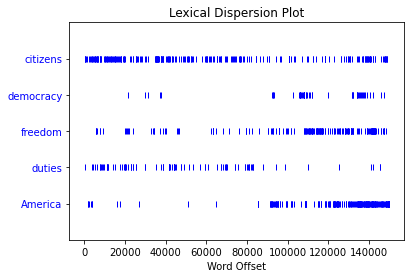

In [24]:
# dispersion plot of "citizens", "democracy", "freedom", "duties", "America"
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [25]:
# length of text1
len(text1)

260819

In [26]:
text4[140000:140100]

['deep',
 'they',
 'will',
 'only',
 'respond',
 'to',
 'a',
 'mentor',
 "'",
 's',
 'touch',
 'or',
 'a',
 'pastor',
 "'",
 's',
 'prayer',
 '.',
 'Church',
 'and',
 'charity',
 ',',
 'synagogue',
 'and',
 'mosque',
 'lend',
 'our',
 'communities',
 'their',
 'humanity',
 ',',
 'and',
 'they',
 'will',
 'have',
 'an',
 'honored',
 'place',
 'in',
 'our',
 'plans',
 'and',
 'in',
 'our',
 'laws',
 '.',
 'Many',
 'in',
 'our',
 'country',
 'do',
 'not',
 'know',
 'the',
 'pain',
 'of',
 'poverty',
 ',',
 'but',
 'we',
 'can',
 'listen',
 'to',
 'those',
 'who',
 'do',
 '.',
 'And',
 'I',
 'can',
 'pledge',
 'our',
 'nation',
 'to',
 'a',
 'goal',
 ':',
 'When',
 'we',
 'see',
 'that',
 'wounded',
 'traveler',
 'on',
 'the',
 'road',
 'to',
 'Jericho',
 ',',
 'we',
 'will',
 'not',
 'pass',
 'to',
 'the',
 'other',
 'side',
 '.',
 'America',
 ',']

In [27]:
type(text1)

nltk.text.Text

In [28]:
# get the vocabulary set of text1
# get vocabulary
set(text1)
len(set(text1))

19317

In [29]:

# sorted list of vocab beginning with punctuation, continuing with 
# words.
sorted(set(text1))

['!',
 '!"',
 '!"--',
 "!'",
 '!\'"',
 '!)',
 '!)"',
 '!*',
 '!--',
 '!--"',
 "!--'",
 '"',
 '"\'',
 '"--',
 '"...',
 '";',
 '$',
 '&',
 "'",
 "',",
 "',--",
 "'-",
 "'--",
 "';",
 '(',
 ')',
 '),',
 ')--',
 ').',
 ').--',
 '):',
 ');',
 ');--',
 '*',
 ',',
 ',"',
 ',"--',
 ",'",
 ",'--",
 ',)',
 ',*',
 ',--',
 ',--"',
 ",--'",
 '-',
 '--',
 '--"',
 "--'",
 '--\'"',
 '--(',
 '---"',
 '---,',
 '.',
 '."',
 '."*',
 '."--',
 ".'",
 '.\'"',
 '.)',
 '.*',
 '.*--',
 '.,',
 '.--',
 '.--"',
 '...',
 '....',
 '.]',
 '000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '144',
 '1492',
 '15',
 '150',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775

In [30]:
words = ['After', 'all', 'is', 'said', 'and', 'done', 'more', 'is', 'said', 'than', 'done']

In [31]:
# get all the tokens of words
# sort them
# see them


In [32]:
# reverse your tokens using list slicing


## Frequency Distribution

How can we automatically identify the words of a text that are most informative about the topic and genre of the text? 

In [33]:
# FreqDist function creates a frequency distribution on text
# call a frequency distribution and call it fdist1
fdist = FreqDist(text1)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

In [34]:
# to create the vocabulary, get the keys of fdist1
vocabulary = fdist.keys()
# The expression keys() gives us a list of all the distinct types 
# in the text
# see the first 50 words in the vocabulary. 
list(vocabulary)[:5]

['[', 'Moby', 'Dick', 'by', 'Herman']

In [35]:
# What is the frequency distribution of the word "whale?"
fdist['Herman']


1

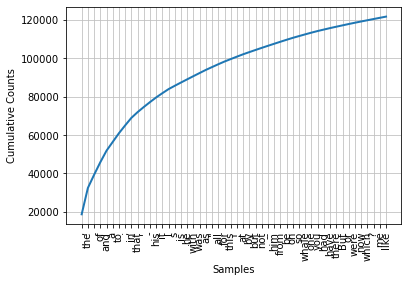

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [36]:
# Plot the cumulative frequency distribution of fifty words

fdist.plot(50, cumulative=True)

In [37]:
# lenght of the text1


In [38]:
# get the words that occur only once, i.e. hapaxes



In [39]:
# What are the words in text4 that has length == 17



## Conditionals
* s.startswith(t)
* s.endswith(t)
* s.islower()
* s.isupper()
* s.isalpha() #Test if all characters in s are alphabetic
* s.isdigit()
* s.istitle() # Test if s is titlecased (all words in s have initial capitals)

In [53]:
# capitalize all the letters in all the words in text1
# write a list comprehension
#[w.upper() for w in text1 if w.startswith('a')]




In [7]:
# list all the words that start with a capital letter 
# in text6 in alphabetical order



# Questions

1) What is the difference between the following two lines? Which one will give a larger value? Will this be the case for other texts?

 * sorted(set([w.lower() for w in text1])
 * sorted([w.lower() for w in set(text1)])
 

2) Use a combination of for and if statements to loop over the words of the movie script for Monty Python and the Holy Grail (text6) and print all the uppercase words, one per line.

3) Find all the four-letter words in the Chat Corpus (text5). With the help of a frequency distribution (FreqDist), show these words in decreasing order of frequency.

4) Write expressions for finding all words in text6 that meet the following conditions.The result should be in the form of a list of words: ['word1', 'word2', ...].
* Ending in ize
* Containing the letter z
* Containing the sequence of letters pt
* All lowercase letters except for an initial capital (i.e., titlecase)